
# Ciência dos Dados - PROJETO 1

## David Fogelman


## Objetivo
O meu objetivo do projeto é definir a relção da escolaridade com o acesso da internet e a renda

## Como a renda e o grau de escolaridade influenciam no acesso á internet no estado de São Paulo para uma população abaixo de 72 anos?

https://tecnologia.uol.com.br/noticias/redacao/2015/04/29/ibge-renda-e-escolaridade-tem-relacao-direta-com-acesso-a-internet.htm

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import os
%matplotlib inline



print('Esperamos trabalhar no diretório')
print(os.getcwd())
print("ok")

Esperamos trabalhar no diretório
E:\Semestre 2\Ciência dos Dados\Projetos\InsperEng-CD
ok


In [3]:
dados = pd.read_csv('Dados_selecionados.csv')

lista = ["UF", "V8005", "V06111", "V4750", "V4745"]
dados = dados.loc[:,lista]

In [7]:
dados_not_null = dados[pd.notnull(dados.UF)&pd.notnull(dados.V8005)&pd.notnull(dados.V06111)&pd.notnull(dados.V4750)&pd.notnull(dados.V4745)]
dados_not_null = dados_not_null[dados.V4750!=999999999999] # tirando rendas inválidas

dados_not_null = dados_not_null[dados.V4745!=8] # tirando ensinos inderteminados

# naonulos13 = naonulos13[dados13.V4614!=999999999999]
# dados_not_null = dados[pd.notnull(dados.V4745)]
# dados.UF.describe()
# dados_not_null.describe()
dados = dados_not_null

dados.V06111 = dados.V06111.astype('category')
dados.V06111.cat.categories = (['Sim', 'Não'])
dados.V4745 = dados.V4745.astype('category')
dados.V4745.cat.categories = (['Sem instrução','Fundamental incompleto ou equivalente','Fundamental completo ou equivalente','Médio incompleto ou equivalente','Médio completo ou equivalente','Superior incompleto ou equivalente','Superior completo' ])


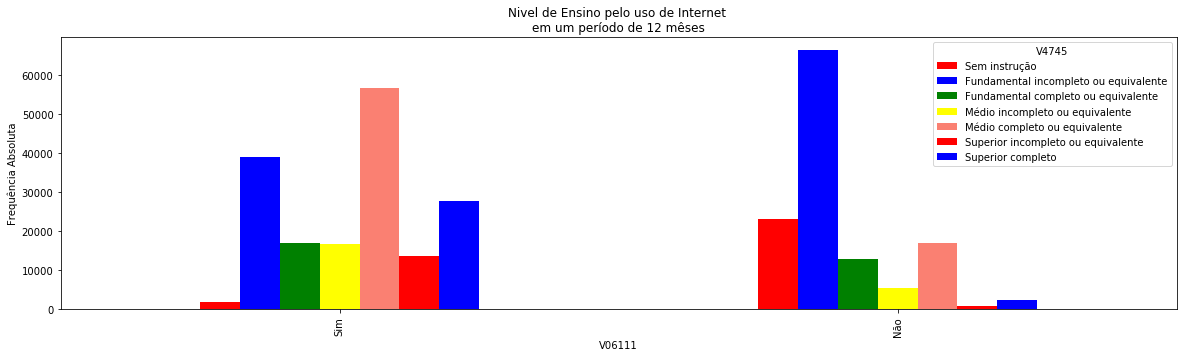

In [14]:
ct1 = pd.crosstab(dados.V06111, dados.V4745)
ct1.plot(kind='bar', color=('red','blue','green','yellow', 'salmon'),figsize=(20, 5))
plt.ylabel('Frequência Absoluta')
plt.title("Nivel de Ensino pelo uso de Internet \nem um período de 12 mêses")

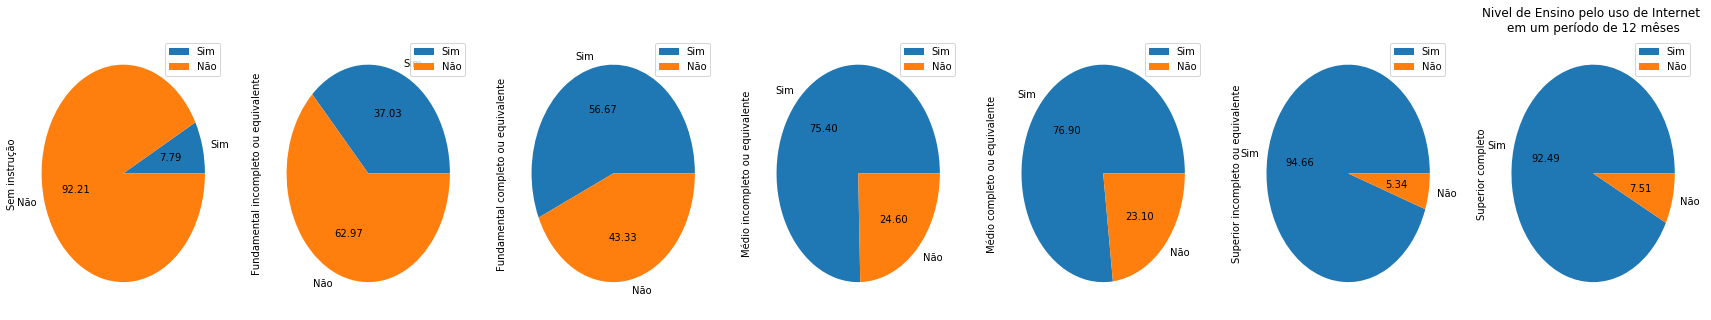

In [9]:
ct1 = pd.crosstab(dados.V06111, dados.V4745)
ct1.plot(kind='pie',subplots = True,figsize=(30, 5),autopct="%0.2f")
# plt.ylabel('Frequência Absoluta')

plt.title("Nivel de Ensino pelo uso de Internet \nem um período de 12 mêses")

In [21]:
# # dados.V4750.describe()
# # bp = dados.V4750.boxplot()
# plot = dados.V4750.plot(kind='box',title='Expectativa de vida de países do mundo')#, color='red')
# plt.ylabel('(em anos)')
# plt.xlabel('Ano')

In [20]:
# # pd.cut() quanti para a quali

# Renda_parc = dados[dados.V4750<5000] # tirando rendas inválidas

# ct2 = Renda_parc.V4750.plot.hist(stacked=False)
# ct2.plot()


# pd.crosstab(Renda_parc.V06111, Renda_parc.V4750)

In [43]:
# pd.crosstab(dados.V06111, dados.V4745)

In [42]:
# pd.crosstab(dados.V06111,  dados.V4750 )

In [41]:
# pd.crosstab([dados.V06111, dados.V4745],dados.V4750,  margins=True)

[]

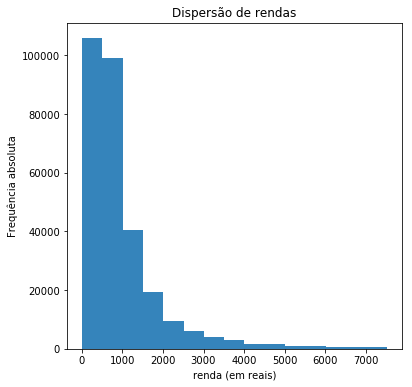

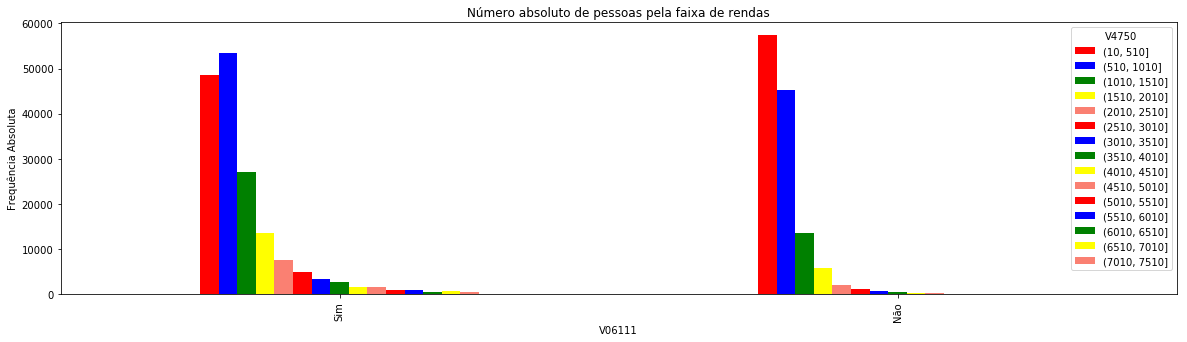

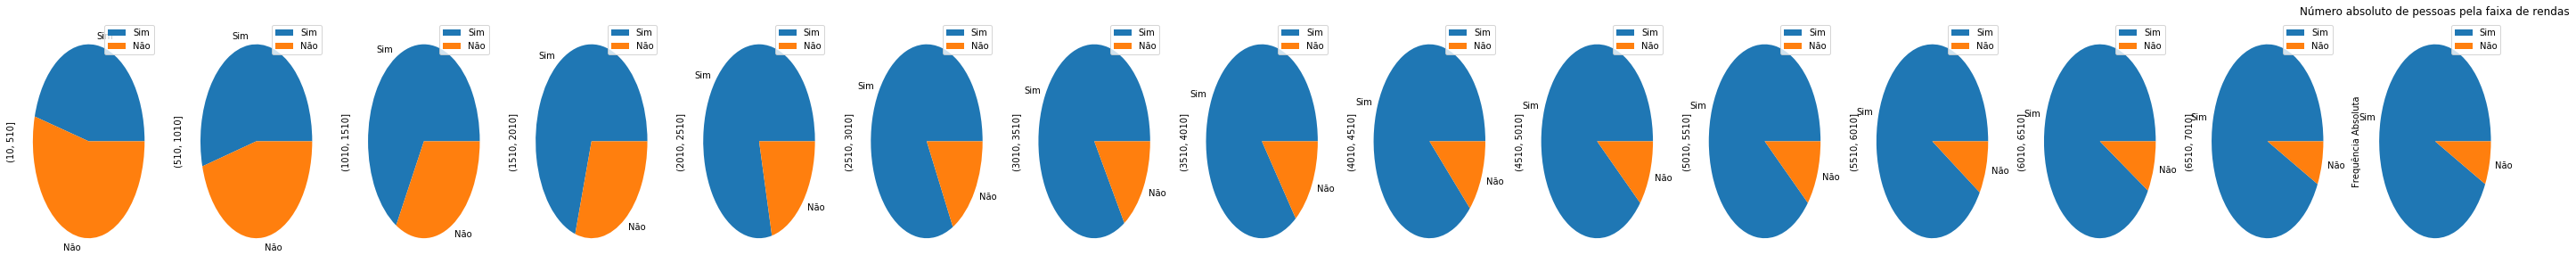

In [52]:
faixa = range(10,8000,500)
RENDA_cat = pd.cut(dados.V4750, bins=faixa)
RENDA_cat.value_counts(sort=False, normalize=True)*100
# RENDA_cat = RENDA_cat[pd.notnull(RENDA_cat)
plot = dados.V4750.plot.hist(bins=faixa,title='Dispersão de rendas', figsize=(6, 6), alpha=0.9)
plt.ylabel('Frequência absoluta')
plt.xlabel('renda (em reais)')
plt.plot()

ct1 = pd.crosstab(dados.V06111, RENDA_cat)
ct1.plot(kind='bar', color=('red','blue','green','yellow', 'salmon'),figsize=(20, 5))
plt.ylabel('Frequência Absoluta')
plt.title("Número absoluto de pessoas pela faixa de rendas")
plt.plot()

# print(RENDA_cat)
ct1 = pd.crosstab(dados.V06111,RENDA_cat)
ct1.plot(kind='pie',figsize=(50, 5),subplots=True)
plt.ylabel('Frequência Absoluta')
plt.title("Número absoluto de pessoas pela faixa de rendas")
plt.plot()